In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hwk1-task3-earthquakes.ipynb")

In [1]:
# # Initialize otter for renamed notebook
# import otter
# grader = otter.Notebook("hwk1-task3-earthquakes-Miller.ipynb")

# Pandas Fundamentals with 2014 Earthquake Data

**Author:** Emily Miller

**GitHub Repository:** [https://github.com/rellimylime/eds220-hwk1.git](https://github.com/rellimylime/eds220-hwk1.git)

---

## About

### Purpose
This notebook demonstrates fundamental data manipulation and visualization techniques using pandas to analyze global earthquake data from 2014. The analysis focuses on understanding earthquake patterns, including their magnitude, location, and depth, while practicing essential pandas operations such as filtering, indexing, and creating informative visualizations.

### Highlights
- **Data Cleaning and Filtering:** Separation of earthquake events from other seismic activity types and proper indexing using unique event identifiers for efficient data access.
- **Statistical Analysis:** Identification and analysis of the 20 largest magnitude earthquakes in 2014, including examination of their locations and depths.
- **Geospatial Visualization:** Creation of scatter plots to visualize the global distribution of significant earthquakes (magnitude > 5) with color-coding by magnitude to reveal spatial patterns in seismic activity.
- **Data Quality Assessment:** Exploration of data completeness and missing values to understand the reliability of different variables in the dataset.

### About the Data
This dataset is derived from the USGS Earthquakes Database and contains information about seismic events recorded in 2014. The dataset includes 120,108 total seismic events, of which 118,398 are classified as earthquakes. Each record contains spatial information (latitude, longitude, depth), magnitude measurements, timing, and descriptive location information.

Key variables include:
- **mag:** Magnitude of the earthquake event
- **latitude/longitude:** Geographic coordinates of the earthquake epicenter
- **depth:** Depth of the earthquake in kilometers
- **time:** Date and time of the event
- **place:** Descriptive location of the earthquake
- **id:** Unique identifier for each event

### References
U.S. Geological Survey. (2014). *USGS Earthquake Database* [Data set]. Retrieved from https://earthquake.usgs.gov/earthquakes/search/

**Acknowledgment:** This assignment was adapted from the *Pandas Fundamentals with Earthquake Data* exercise in Ryan Abernathey & Kerry Key. (2021). *Earth and Environmental Data Science*. https://earth-env-data-science.github.io/intro.html

---

## Setup and Data Loading

We'll begin by importing the necessary Python libraries and loading the earthquake dataset for our analysis.

In [ ]:
# Import pandas
import pandas as pd

# Read in the earthquake data
raw_eqk = pd.read_csv("data/earthquake_data.csv")

---

## Exploring Dataset Structure

Let's examine the basic structure and properties of our earthquake dataset to understand its dimensions and composition.

Preview the first few rows to understand the structure and content of our dataset.

In [ ]:
# Display the first few rows of the data
raw_eqk_head = raw_eqk.head()
raw_eqk_head

In [ ]:
grader.check("q1_c")

q1_c results: All test cases passed!

Understand dataset dimensions by checking the shape of the DataFrame.

In [ ]:
# Get and view the shape of the data
raw_eqk_shape = raw_eqk.shape
raw_eqk_shape

(120108, 8)

In [ ]:
grader.check("q2_a")

q2_a results: All test cases passed!

Understanding Data Structure Types

In [ ]:
# Get and view the type of the shape object
raw_eqk_shape_type = type(raw_eqk_shape)
raw_eqk_shape_type

In [ ]:
grader.check("q2_b")

q2_b results: All test cases passed!

Extract the number of rows to quantify the total earthquake events recorded.

In [ ]:
# Get the number of rows in the data
num_rows = raw_eqk_shape[0]

In [ ]:
grader.check("q2_c")

q2_c results: All test cases passed!

Find the unique event types present in the dataset to understand the variety of seismic activities recorded.

In [ ]:
# Get the unique event types in the 'type' column
unique_events = raw_eqk['type'].unique()

In [ ]:
grader.check("q3")

q3 results: All test cases passed!

Filter the dataset to include only earthquake-type events and set the unique event identifier as the index for efficient data access.

In [ ]:
# Select only earthquake events and store them as `eqk` (variable name). 
# Update the index of `eqk` to be the `id` column of the dataframe.
eqk = raw_eqk[raw_eqk['type'] == 'earthquake'].set_index('id')

In [ ]:
# View the dataframe
eqk

,time,latitude,longitude,depth,mag,place,type
id,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...
ak11453391,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,"29km SW of Valdez, Alaska",earthquake
ak11453395,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,"102km SSE of Old Iliamna, Alaska",earthquake
nc72358451,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,"9km WNW of Cobb, California",earthquake


In [17]:
grader.check("q4_a")

q4_a results: All test cases passed!

Verify that the eqarthquake events have been correctly filtered and indexed.

In [ ]:
# Get and view the first three rows of eqk
eqk_3 = eqk.head(3)
eqk_3

In [20]:
grader.check("q4_b")

q4_b results: All test cases passed!

Calculate how many non-earthquake events were present in the original dataset.

In [ ]:
# Calculate how many non-earthquake events were present in the original dataset.
omitted_events = raw_eqk.shape[0] - eqk.shape[0]

In [22]:
grader.check("q5")

q5 results: All test cases passed!

Create a histogram to visualize the distribution and frequency of different earthquake magnitudes in 2014.

<Axes: title={'center': 'Magnitude of Earthquakes in 2014'}, xlabel='Earthquake Magnitude', ylabel='Frequency'>

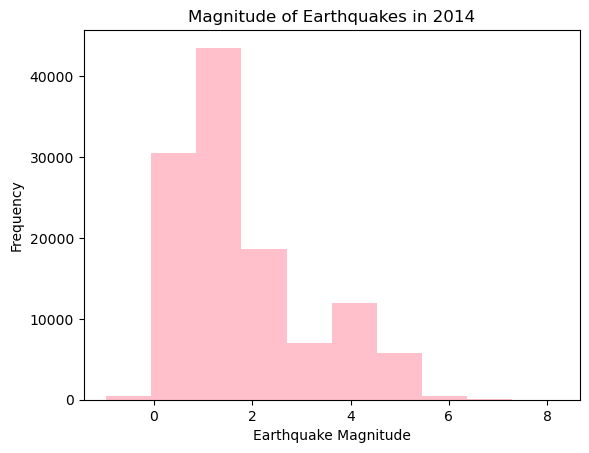

In [ ]:
# Plot a histogram of the earthquake's magnitudes (`eqk` data).
eqk['mag'].plot(kind = "hist",
               title = "Magnitude of Earthquakes in 2014",
               color = "pink",
               xlabel = "Earthquake Magnitude")

Identify and analyze the 20 largest magnitude earthquakes in 2014.

In [ ]:
# Get and view the 20 largest magnitude earthquakes
top20 = eqk['mag'].nlargest(20)
top20

In [26]:
grader.check("q7_a")

q7_a results: All test cases passed!

Create a bar plot showing the magnitude of the top 20 earthquakes.

<Axes: title={'center': '20 Largest Earthquakes in 2014'}, xlabel='Earthquake ID', ylabel='Earthquake Magnitude'>

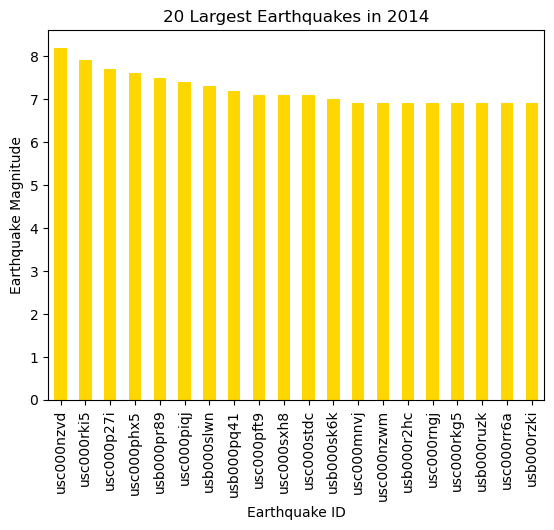

In [ ]:
# Create a bar plot showing the magnitude of the top 20 earthquakes.
top20.plot(kind = "bar",
           title = "20 Largest Earthquakes in 2014",
           xlabel = "Earthquake ID",
           ylabel = "Earthquake Magnitude",
           color = "gold")

*Understanding the Role of Index Visualization: If we had not updated the index, the x values would be the row number of the earthquake from the original data frame rather than the earthquake id. This would make it much more difficult to reference a particular earthquake later.*

For the 20 largest earthquakes, we extract key information including location, magnitude, and depth to better understand their characteristics.

In [ ]:
# Get the place, magnitude, and depth of the top 20 largest magnitude earthquakes
top20_filtered = eqk.loc[eqk['mag'].nlargest(20).index, ['place', 'mag', 'depth']]

In [ ]:
# View the information
top20_filtered

,place,mag,depth
id,,,
usc000nzvd,"94km NW of Iquique, Chile",8.2,25.00
usc000rki5,"19km SE of Little Sitkin Island, Alaska",7.9,109.00
usc000p27i,"53km SW of Iquique, Chile",7.7,22.40
usc000phx5,"93km SSE of Kirakira, Solomon Islands",7.6,22.56
usb000pr89,"70km SW of Panguna, Papua New Guinea",7.5,43.37
usc000piqj,"112km S of Kirakira, Solomon Islands",7.4,39.00
usb000slwn,"74km S of Intipuca, El Salvador",7.3,40.00
usb000pq41,"33km ESE of Petatlan, Mexico",7.2,24.00
usc000pft9,"56km WSW of Panguna, Papua New Guinea",7.1,60.53


In [30]:
grader.check("q8")

q8 results: All test cases passed!

A scatter plot of earthquakes with magnitude greater than 5 shows their global distribution. Points are colored by magnitude to highlight the most severe events and reveal spatial patterns in seismic activity.

<Axes: title={'center': 'Location of Earthquakes in 2014'}, xlabel='longitude', ylabel='latitude'>

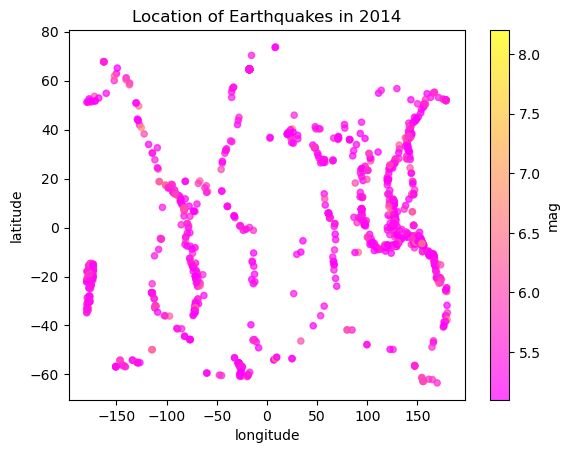

In [ ]:
# Create a scatter plot showing the location of earthquakes with magnitude greater than 5.
eqk[eqk['mag'] > 5].plot(kind = "scatter",
                         x = "longitude",
                         y = "latitude",
                         c = "mag",
                         cmap = "spring",
                         alpha = 0.7,
                         title = "Location of Earthquakes in 2014"
        )

In [32]:
grader.check_all()

q1_c results: All test cases passed!

q2_a results: All test cases passed!

q2_b results: All test cases passed!

q2_c results: All test cases passed!

q3 results: All test cases passed!

q4_a results: All test cases passed!

q4_b results: All test cases passed!

q5 results: All test cases passed!

q7_a results: All test cases passed!

q8 results: All test cases passed!

<!-- END QUESTION -->

